In [26]:
# imports
import configparser
import os
from bs4 import BeautifulSoup 
import requests 
from time import sleep 
from collections import Counter 
import pandas as pd 
import numpy as np
from time import sleep
from random import randint
from selenium import webdriver
import re           
import datetime
import seaborn as sns
from matplotlib import pyplot as plt

%matplotlib inline

In [27]:
"""I start by writing a simple function to create a list of url's to scrape, representing each year of F1 races"""

def get_urls():
    global YEARS
    global all_race_url
    global url
    
    YEARS=list(range(1950,2021)) 
    all_race_url=[]
    for year in YEARS:
        url=f'https://www.formula1.com/en/results.html/{year}/races.html'
        all_race_url.append(url)
    return all_race_url

get_urls()

#^^^ We know F1 has been going since 1950, so 'YEARS', is a list of numerical values from 1950-2020 ^^^
#^^^ Next I wrote a simple loop, utilizing f string to iterate through the list of YEARS 
# and input year into the url and appended to an empty list as 'all_race_url'

['https://www.formula1.com/en/results.html/1950/races.html',
 'https://www.formula1.com/en/results.html/1951/races.html',
 'https://www.formula1.com/en/results.html/1952/races.html',
 'https://www.formula1.com/en/results.html/1953/races.html',
 'https://www.formula1.com/en/results.html/1954/races.html',
 'https://www.formula1.com/en/results.html/1955/races.html',
 'https://www.formula1.com/en/results.html/1956/races.html',
 'https://www.formula1.com/en/results.html/1957/races.html',
 'https://www.formula1.com/en/results.html/1958/races.html',
 'https://www.formula1.com/en/results.html/1959/races.html',
 'https://www.formula1.com/en/results.html/1960/races.html',
 'https://www.formula1.com/en/results.html/1961/races.html',
 'https://www.formula1.com/en/results.html/1962/races.html',
 'https://www.formula1.com/en/results.html/1963/races.html',
 'https://www.formula1.com/en/results.html/1964/races.html',
 'https://www.formula1.com/en/results.html/1965/races.html',
 'https://www.formula1.c

In [28]:

"""Function to check status_code for url requests.
    Will iterate through list of url's"""

def status_code():
    global result
    global soup
    for url in all_race_url:
        result=requests.get(url)
        soup=BeautifulSoup(result.content)
        result.status_code
        if result.status_code != 200:
            print(url,'STATUS_CODE ERROR')
            break
        else:
            None
    print('SUCCESS: ALL STATUS CODES=200')
    
status_code()

#^^^ Function to iterate through the list of url's in 'all_race_url' and check status_code for each url, will return ERROR message and url if url status_code is not 200 ^^^

SUCCESS: ALL STATUS CODES=200


In [29]:

"""Function to scrape, clean, create pandas dataframes and then join all into 1 table"""

def get_page_data():
    global gp_list
    global winners_list
    global teams_list
    global lap_list
    global times_list
    global dates_list
    #^^^ Set variable as global values to have access to dataframe outside of function 
    
    gp_list=[]
    for x in all_race_url:
        result=requests.get(x)
        soup=BeautifulSoup(result.content, 'lxml')
        grand_prix_list=[tag.get_text(strip=True) for tag in soup.find_all('td', class_='dark bold')][0::2]
        gp_list.append(grand_prix_list)
        #^^^ Collect all GP's to a list of lists from all urls^^^
        
    winners_list=[]
    for x in all_race_url:
        result=requests.get(x)
        soup=BeautifulSoup(result.content, 'lxml')
        race_winner=[tag.get_text(strip=True) for tag in soup.find_all('td', class_='dark bold')][1::2]
        winners_list.append(race_winner)
        #^^^ Collect all race winner's to a list of lists from all urls^^^
        
    teams_list=[]
    for x in all_race_url:
        result=requests.get(x)
        soup=BeautifulSoup(result.content, 'lxml')
        team_list=[tag.get_text(strip=True) for tag in soup.find_all('td', class_='semi-bold uppercase')]
        teams_list.append(team_list)
        #^^^ Collect all winning teams to a list of lists from all urls^^^
        
    lap_list=[]
    for x in all_race_url:
        result=requests.get(x)
        soup=BeautifulSoup(result.content, 'lxml')
        laps_list=[tag.get_text(strip=True) for tag in soup.find_all('td', class_='bold hide-for-mobile')]
        lap_list.append(laps_list)
        #^^^ Collect all lap counts to a list of lists from all urls^^^
        
    times_list=[]
    for x in all_race_url:
        result=requests.get(x)
        soup=BeautifulSoup(result.content, 'lxml')
        time_list=[tag.get_text(strip=True) for tag in soup.find_all('td', class_='dark bold hide-for-tablet')]
        times_list.append(time_list)
        #^^^ Collect all race times to a list of lists from all urls^^^
        
    dates_list=[]
    for x in all_race_url:
        result=requests.get(x)
        soup=BeautifulSoup(result.content, 'lxml')
        race_date_list=[tag.get_text(strip=True) for tag in soup.find_all('td', class_='dark hide-for-mobile')]
        dates_list.append(race_date_list)
        #^^^ Collect all race dates to a list of lists from all urls^^^
        
        #^^^ Collecting all desired columns ^^^
    #return teams_list

get_page_data()

In [30]:

""" Function will append list of lists from previous function (get_page_data) 
to a list of all values for each column """

def one_list():
    global full_gp
    global full_winner
    global full_teams
    global full_lap
    global full_times
    global full_dates
    #^^^ Set variable as global values to have access to dataframe outside of function 

    full_gp=[]
    for l in gp_list:
        for x in l:
            full_gp.append(x)
    #^^^ Append gp data into new list full_gp ^^^
            
    full_winner=[]
    for l in winners_list:
        for x in l:
            x=x[:-3]
            full_winner.append(x)
    #^^^ Append winners data into new list full_winner ^^^
    #^^^ Cleaning up the values in the winners columns by droping last 3 characters ^^^
            
    full_teams=[]
    for l in teams_list:
        for x in l:
            full_teams.append(x)
    #^^^ Append teams data into new list full_winner ^^^
            
    full_lap=[]
    for l in lap_list:
        for x in l:
            full_lap.append(x)
    #^^^ Append lap data into new list full_winner ^^^
            
    full_times=[]
    for l in times_list:
        for x in l:
            x=x[:-4]
            full_times.append(x.split(':'))
    #^^^ Append time data into new list full_winner ^^^
    #^^^ Split up time column by hour, min, sec ^^^
            
    full_dates=[]
    for l in dates_list:
        for x in l:
            full_dates.append(x)    
    #^^^ Append dates data into new list full_winner ^^^
            
    #return full_times

one_list()

In [31]:

""" Create pandas dataframes for each list created in the previous step & concat the lists, column wise """

full_gp=pd.DataFrame(full_gp)
full_winner=pd.DataFrame(full_winner)
full_teams=pd.DataFrame(full_teams)
full_dates=pd.DataFrame(full_dates)
full_lap=pd.DataFrame(full_lap)
full_times=pd.DataFrame(full_times)
#^^^ Creating pandas dataframes for each list of values ^^^
    
full_df=pd.concat([full_dates, full_gp, full_winner, full_teams, full_times,full_lap], axis='columns')
#^^^ Combine dataframes into new dataframe (full_df) ^^^
full_df

,0,0,0,0,0,1,2,0
0,13 May 1950,Great Britain,NinoFarina,Alfa Romeo,2,13,23,70
1,21 May 1950,Monaco,Juan ManuelFangio,Alfa Romeo,3,13,18,100
2,30 May 1950,Indianapolis 500,JohnnieParsons,Kurtis Kraft Offenhauser,2,46,55,138
3,04 Jun 1950,Switzerland,NinoFarina,Alfa Romeo,2,02,53,42
4,18 Jun 1950,Belgium,Juan ManuelFangio,Alfa Romeo,2,47,26,35
...,...,...,...,...,...,...,...,...
1027,30 Aug 2020,Belgium,LewisHamilton,Mercedes,1,24,08,44
1028,06 Sep 2020,Italy,PierreGasly,AlphaTauri Honda,1,47,06,53
1029,13 Sep 2020,Tuscany,LewisHamilton,Mercedes,2,19,35,59
1030,27 Sep 2020,Russia,ValtteriBottas,Mercedes,1,34,00,53


In [32]:

""" Assign column names to the new dataframe & write dataframe to csv format and store locally """

full_df.columns=['Date', 'Grand_Prix', 'Winner', 'Team', 'finish_time_H', 'finish_time_M', 'finish_time_S', 'Laps']

full_df.to_csv('f1_full_df.csv')
full_df.head(10)

,Date,Grand_Prix,Winner,Team,finish_time_H,finish_time_M,finish_time_S,Laps
0,13 May 1950,Great Britain,NinoFarina,Alfa Romeo,2,13,23,70
1,21 May 1950,Monaco,Juan ManuelFangio,Alfa Romeo,3,13,18,100
2,30 May 1950,Indianapolis 500,JohnnieParsons,Kurtis Kraft Offenhauser,2,46,55,138
3,04 Jun 1950,Switzerland,NinoFarina,Alfa Romeo,2,02,53,42
4,18 Jun 1950,Belgium,Juan ManuelFangio,Alfa Romeo,2,47,26,35
5,02 Jul 1950,France,Juan ManuelFangio,Alfa Romeo,2,57,52,64
6,03 Sep 1950,Italy,NinoFarina,Alfa Romeo,2,51,17,80
7,27 May 1951,Switzerland,Juan ManuelFangio,Alfa Romeo,2,07,53,42
8,30 May 1951,Indianapolis 500,LeeWallard,Kurtis Kraft Offenhauser,3,57,38,200
9,17 Jun 1951,Belgium,NinoFarina,Alfa Romeo,2,45,46,36


In [33]:

""" Check which columns have null values, if any"""

full_df.isnull().any()

Date             False
Grand_Prix       False
Winner           False
Team             False
finish_time_H    False
finish_time_M     True
finish_time_S     True
Laps             False
dtype: bool

In [34]:

""" After finding null values, we will use .replace() and .fillna() 
to replace empty string values with the value 0 and replace nan values with 0 """

full_df['finish_time_H']=full_df['finish_time_H'].replace('', 0)
full_df['finish_time_M']=full_df['finish_time_M'].replace('', 0)
full_df['finish_time_S']=full_df['finish_time_S'].replace('', 0)

full_df['finish_time_H']=full_df['finish_time_H'].fillna(0) 
full_df['finish_time_M']=full_df['finish_time_M'].fillna(0)
full_df['finish_time_S']=full_df['finish_time_S'].fillna(0)

In [35]:

""" Check again which columns have null values, 
to see if the last step took care of these values """

full_df.isnull().any()

Date             False
Grand_Prix       False
Winner           False
Team             False
finish_time_H    False
finish_time_M    False
finish_time_S    False
Laps             False
dtype: bool

In [36]:

""" Next we convert the hour, min, sec columns as INTEGER types and convert values to seconds """

full_df['finish_time_H']=full_df['finish_time_H'].astype(int)*3600
#^^^ We multiply the hour values by 3600 to get seconds conversion ^^^

full_df['finish_time_M']=full_df['finish_time_M'].astype(int)*60
#^^^ We multiply the min values by 60 to get seconds conversion ^^^

full_df['finish_time_S']=full_df['finish_time_S'].astype(int)
full_df

,Date,Grand_Prix,Winner,Team,finish_time_H,finish_time_M,finish_time_S,Laps
0,13 May 1950,Great Britain,NinoFarina,Alfa Romeo,7200,780,23,70
1,21 May 1950,Monaco,Juan ManuelFangio,Alfa Romeo,10800,780,18,100
2,30 May 1950,Indianapolis 500,JohnnieParsons,Kurtis Kraft Offenhauser,7200,2760,55,138
3,04 Jun 1950,Switzerland,NinoFarina,Alfa Romeo,7200,120,53,42
4,18 Jun 1950,Belgium,Juan ManuelFangio,Alfa Romeo,7200,2820,26,35
...,...,...,...,...,...,...,...,...
1027,30 Aug 2020,Belgium,LewisHamilton,Mercedes,3600,1440,8,44
1028,06 Sep 2020,Italy,PierreGasly,AlphaTauri Honda,3600,2820,6,53
1029,13 Sep 2020,Tuscany,LewisHamilton,Mercedes,7200,1140,35,59
1030,27 Sep 2020,Russia,ValtteriBottas,Mercedes,3600,2040,0,53


In [37]:

""" Next we perform addition on the hour, min and seconds columns
to get our total race time in seconds and assign this column the name RaceTime_sec"""

full_df['RaceTime_sec']=(full_df['finish_time_H']+full_df['finish_time_M']+full_df['finish_time_S'])
full_df

,Date,Grand_Prix,Winner,Team,finish_time_H,finish_time_M,finish_time_S,Laps,RaceTime_sec
0,13 May 1950,Great Britain,NinoFarina,Alfa Romeo,7200,780,23,70,8003
1,21 May 1950,Monaco,Juan ManuelFangio,Alfa Romeo,10800,780,18,100,11598
2,30 May 1950,Indianapolis 500,JohnnieParsons,Kurtis Kraft Offenhauser,7200,2760,55,138,10015
3,04 Jun 1950,Switzerland,NinoFarina,Alfa Romeo,7200,120,53,42,7373
4,18 Jun 1950,Belgium,Juan ManuelFangio,Alfa Romeo,7200,2820,26,35,10046
...,...,...,...,...,...,...,...,...,...
1027,30 Aug 2020,Belgium,LewisHamilton,Mercedes,3600,1440,8,44,5048
1028,06 Sep 2020,Italy,PierreGasly,AlphaTauri Honda,3600,2820,6,53,6426
1029,13 Sep 2020,Tuscany,LewisHamilton,Mercedes,7200,1140,35,59,8375
1030,27 Sep 2020,Russia,ValtteriBottas,Mercedes,3600,2040,0,53,5640


In [38]:

""" Next we reassign our full_df variable to a new dataframe and keep only
'Date', 'Grand_Prix', 'Winner', 'Team', 'Laps', 'RaceTime_sec' columns """

full_df=full_df[['Date', 'Grand_Prix', 'Winner', 'Team', 'Laps', 'RaceTime_sec']]


""" Next we replace all nan and empty string values from the Laps column and cast it as a INTEGER """

full_df['Laps'].replace('', 0, inplace=True)
full_df['Laps'].replace('null', 0, inplace=True)
full_df['Laps'].fillna(0, inplace=True)
full_df.isnull().any()
full_df['Laps']=full_df['Laps'].astype(int)

C:\Users\manny\anaconda3\lib\site-packages\pandas\core\generic.py:6746: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
C:\Users\manny\anaconda3\lib\site-packages\pandas\core\generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)
<ipython-input-38-32c478295d28>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fu

In [39]:

""" Now I create a new column called AVG_Lap_Time_sec by 
dividing the RaceTime_sec column by number of Laps per GP. 
This will give us the average time it took the winner per lap """

full_df['AVG_Lap_Time_sec']=(full_df['RaceTime_sec']/full_df['Laps'])


<ipython-input-39-d346c9919821>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['AVG_Lap_Time_sec']=(full_df['RaceTime_sec']/full_df['Laps'])


In [40]:

""" Now we can convert the date column to a pandas dattime type, 
sort the values by date in ascending order and then set index as the date column """

full_df['Date']=pd.to_datetime(full_df['Date'])
full_df.sort_values(by=['Date'], ascending=False, inplace=True)
full_df.set_index('Date', inplace=True)


<ipython-input-40-856ccf59a9c0>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df['Date']=pd.to_datetime(full_df['Date'])
<ipython-input-40-856ccf59a9c0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  full_df.sort_values(by=['Date'], ascending=False, inplace=True)


In [41]:

""" Now we write the full_df file to csv format and save locally """

full_df.to_csv('f1_final_df.csv')

In [42]:

""" Next we will extract races for certain GP's (Great Britain, Italy, Belgium, Monaco, Canada) 
and assign these each to its own dataframe """

gb_df=full_df.loc[full_df['Grand_Prix'].isin(['Great Britain'])]
itl_df=full_df.loc[full_df['Grand_Prix'].isin(['Italy'])]
blg_df=full_df.loc[full_df['Grand_Prix'].isin(['Belgium'])]
mnc_df=full_df.loc[full_df['Grand_Prix'].isin(['Monaco'])]
can_df=full_df.loc[full_df['Grand_Prix'].isin(['Canada'])]

In [43]:

""" Reset indexes on all 5 dataframes created in the previous step """

gb_df=gb_df.reset_index()
itl_df=itl_df.reset_index()
blg_df=blg_df.reset_index()
mnc_df=mnc_df.reset_index()
can_df=can_df.reset_index()


In [44]:

""" Combine the 5 new dataframes to create top_gp """

top_gp=pd.concat([gb_df,itl_df,blg_df,mnc_df,can_df])

In [45]:
top_gp

,Date,Grand_Prix,Winner,Team,Laps,RaceTime_sec,AVG_Lap_Time_sec
0,2020-08-02,Great Britain,LewisHamilton,Mercedes,52,5281,101.557692
1,2019-07-14,Great Britain,LewisHamilton,Mercedes,52,4868,93.615385
2,2018-07-08,Great Britain,SebastianVettel,Ferrari,52,5249,100.942308
3,2017-07-16,Great Britain,LewisHamilton,Mercedes,51,4887,95.823529
4,2016-07-10,Great Britain,LewisHamilton,Mercedes,52,5695,109.519231
...,...,...,...,...,...,...,...
45,1971-09-19,Canada,JackieStewart,Tyrrell Ford,64,6912,108.000000
46,1970-09-20,Canada,JackyIckx,Ferrari,90,8478,94.200000
47,1969-09-20,Canada,JackyIckx,Brabham Ford,90,7165,79.611111
48,1968-09-22,Canada,DennyHulme,McLaren Ford,90,8831,98.122222


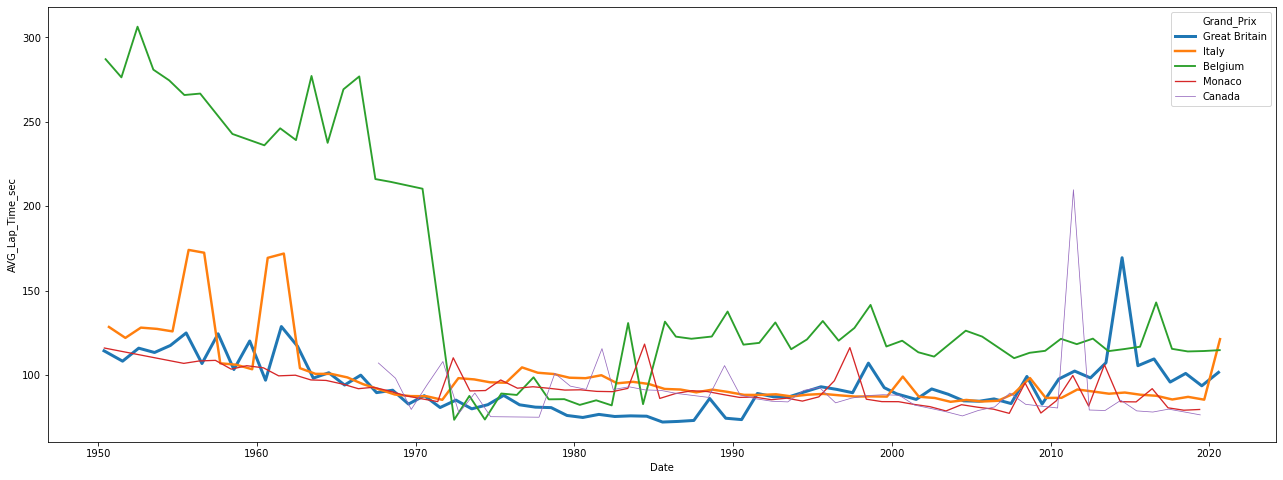

In [46]:

""" Now we plot out the AVG_Lap_Time_sec for these 5 GP's with date, identifying the lines by color and size"""

plt.figure(figsize=(22,8))
topgp_plot=sns.lineplot(data=top_gp, x='Date', y='AVG_Lap_Time_sec', hue='Grand_Prix', size='Grand_Prix', legend='full')


In [47]:

""" Assign new url to wiki_url """

wiki_url='https://en.wikipedia.org/wiki/List_of_Formula_One_fatalities'

In [48]:

""" Using pandas read_html, we will read in the data from the wiki_url link, rename the columns and save locally as a csv file"""

acc_df=pd.read_html(wiki_url,header=0)[2]
acc_df.columns=['Driver', 'Date_of_accident', 'Event_', 'GP', 'Car', 'Session_', 'ref']
acc_df.to_csv('fatal_history.csv')



""" Next reassign acc_df to keep only desired columns ('Driver', 'Date_of_accident', 'GP', 'Session_')
And convert Date_of_accident to a pandas datetime type and save locally to a csv file """

acc_df=acc_df[['Driver', 'Date_of_accident', 'GP', 'Session_']]
acc_df['Date_of_accident']=pd.to_datetime(acc_df['Date_of_accident'])

acc_df.to_csv('fatal_history.csv')

acc_df.head()

,Driver,Date_of_accident,GP,Session_
0,Cameron Earl (UK),1952-06-18,MIRA,Test
1,Chet Miller (USA),1953-05-15,Indianapolis Motor Speedway,Practice
2,Charles de Tornaco (BEL),1953-09-18,Autodromo di Modena,Practice
3,Onofre Marimón (ARG),1954-07-31,Nürburgring,Practice
4,Mario Alborghetti (ITA),1955-04-11,Circuit de Pau-Ville,Race
